# 분류
- 입력 데이터를 미리 정의된 여러 클래스 중 하나로 예측하는 것 (범주형 데이터)
    - 이진 분류: 양성(1), 음성(0) 중에 하나를 맞추는 것
    - 다중 분류: 여러 클래스 중 하나를 맞추는 것

### Logistic Regression
- 선형 회귀 방식으로 분류 문제를 해결하는 모델 (regression 이름을 가지고 있지만 회귀가 아닌 분류에 사용하는 모델)
    - 이진 분류: 이진 분류를 위한 로지스틱 함수(시그모이드)를 통해 확률값을 계산하고 0 또는 1로 분류
    - 다중 분류: 다중 분류를 위한 소프트맥스 함수를 통해 각 클래스별 확률값을 계산해 다중 분류

**하이퍼 파라미터**

<table>
  <thead>
    <tr>
      <th>하이퍼파라미터</th>
      <th>설명</th>
      <th>기본값</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>penalty</code></td>
      <td>정규화의 종류 지정 / <code>'l1'</code>, <code>'l2'</code>, <code>'elasticnet'</code>, <code>'none'</code> 중 선택</td>
      <td><code>'l2'</code></td>
    </tr>
    <tr>
      <td><code>C</code></td>
      <td>정규화의 강도를 제어 / 값이 작을수록 강한 정규화 적용 (<code>1 / λ</code>로 해석 가능)</td>
      <td><code>1.0</code></td>
    </tr>
    <tr>
      <td><code>solver</code></td>
      <td>최적화 알고리즘 선택 / <code>'newton-cg'</code>, <code>'lbfgs'</code>, <code>'liblinear'</code>, <code>'sag'</code>, <code>'saga'</code> 중 선택</td>
      <td><code>'lbfgs'</code></td>
    </tr>
    <tr>
      <td><code>max_iter</code></td>
      <td>최적화를 위한 최대 반복 횟수</td>
      <td><code>100</code></td>
    </tr>
    <tr>
      <td><code>multi_class</code></td>
      <td>다중 클래스 문제에서 사용할 전략 / <code>'auto'</code>, <code>'ovr'</code> (one-vs-rest), <code>'multinomial'</code> 중 선택</td>
      <td><code>'auto'</code></td>
    </tr>
    <tr>
      <td><code>fit_intercept</code></td>
      <td>절편을 학습할지 여부 / <code>True</code> 또는 <code>False</code></td>
      <td><code>True</code></td>
    </tr>
  </tbody>
</table>

**solver**

<table>
  <thead>
    <tr>
      <th>Solver</th>
      <th>설명</th>
      <th>특징</th>
      <th>추천 사용 상황</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><strong>liblinear</strong></td>
      <td>선형 분류를 위한 라이브러리인 "LIBLINEAR"에서 유래, 작은 데이터셋이나 희소 데이터셋에 적합한 이중 좌표축 감소법(Dual Coordinate Descent Algorithm) 사용</td>
      <td>빠르고 메모리 효율적이며, L1 및 L2 정규화 모두를 지원</td>
      <td>작은 크기의 데이터셋, 희소한 피처를 가진 데이터셋</td>
    </tr>
    <tr>
      <td><strong>newton-cg</strong></td>
      <td>Newton Conjugate Gradient 뉴턴법을 사용한 최적화 알고리즘, 큰 데이터셋에서도 효율적으로 동작</td>
      <td>L2 정규화를 지원하며, 대규모 데이터셋에 적합</td>
      <td>중대형 크기의 데이터셋</td>
    </tr>
    <tr>
      <td><strong>lbfgs</strong></td>
      <td>Broyden-Fletcher-Goldfarb-Shanno(BFGS) 알고리즘의 변형인 L-BFGS(Limited-memory Broyden–Fletcher–Goldfarb–Shanno) 알고리즘을 사용</td>
      <td>L2 정규화를 지원하며, 메모리를 절약하면서도 효율적인 성능을 발휘</td>
      <td>대규모 데이터셋, 다중 클래스 분류</td>
    </tr>
    <tr>
      <td><strong>sag</strong></td>
      <td>Stochastic Average Gradient 하강법으로, 점진적으로 평균 그래디언트를 사용하여 최적화</td>
      <td>매우 큰 데이터셋에서 효율적이며, L2 정규화를 지원</td>
      <td>매우 큰 크기의 데이터셋</td>
    </tr>
    <tr>
      <td><strong>saga</strong></td>
      <td>Stochastic Average Gradient Augmented / sag의 확장판으로, L1 및 L2 정규화 모두를 지원</td>
      <td>희소 데이터셋에도 적합하며, 매우 큰 데이터셋에서 효율적</td>
      <td>매우 큰 크기의 데이터셋, 희소한 피처를 가진 데이터셋</td>
    </tr>
  </tbody>
</table>

#### 이진 분류를 위한 Sigmoid 함수
- 선형회귀식을 통해 도출한 예측값(z)을 0과 1 사이의 수로 변환해주는 활성화 함수(Activation Function)

$$ 
    시그모이드(z) = \frac{1}{1 + e^{-z}}
$$

![](https://d.pr/i/tTdKdt+)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

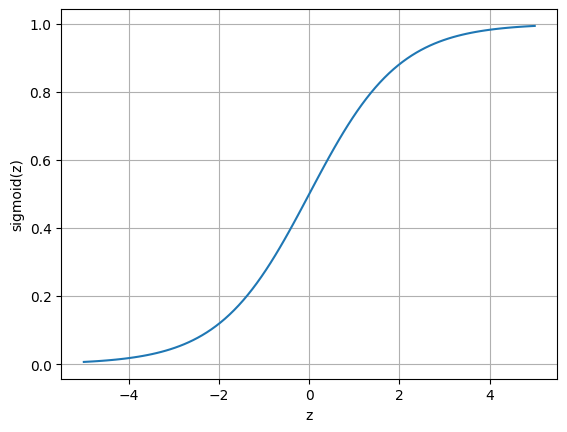

In [6]:
# 시그모이드 시각화
z = np.linspace(-5,5,100) # 선형회귀 결과값
sigmoid_value = 1 / (1 + np.exp(-z))


plt.plot(z, sigmoid_value)
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.grid()
plt.show()

In [ ]:
# 도미, 빙어 데이터셋 준비
fish_df = pd.read_csv('./data/fish.csv')
# fish_df['Species'].value_counts()

is_bream_or_smelt = (fish_df['Species'] == 'Bream') | (fish_df['Species'] == 'Smelt')
fish_df = fish_df[is_bream_or_smelt] # is_bream_or_smelt를 사용해서 fish_df를 아예 덮어쓰게 함
fish_df.shape

(49, 6)

In [14]:
# 데이터셋 분리 및 정규화
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 특성 - 라벨 데이터 분리
X = fish_df.drop('Species', axis=1)
y = fish_df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

# 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# 모델 학습 및 평가
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled, y_train)
print(lr_clf.score(X_train_scaled, y_train), lr_clf.score(X_test_scaled, y_test))

1.0 1.0


In [ ]:
y_pred = lr_clf.predict(X_test_scaled[:3])
y_pred # output: ['Bream', 'Smelt', 'Smelt']

print(lr_clf.classes_)  # output: ['Bream' 'Smelt'] # 분류 카테고리
lr_clf.predict_proba(X_test_scaled[:3]) # 클래스별 확률 # predict_proba: 예측하는 값에 대한 확률을 보여주는 것 [bream일 확률 컬럼, smelt일 확률 컬럼]

['Bream' 'Smelt']


array([[0.98159822, 0.01840178],
       [0.04990096, 0.95009904],
       [0.09298277, 0.90701723]])

In [ ]:
# 가중치, 절편
lr_clf.coef_, lr_clf.intercept_

(array([[-0.57717269, -0.79233938, -0.82533982, -0.86579233, -0.82205625]]),
 array([-2.38186126]))

In [ ]:
# (w1x1 + w2x2 + w3x3 + w4x4 + w5x5) + b 

# 선형 회귀값을 직접 계산
z1 = np.dot(X_test_scaled[:3], lr_clf.coef_[0]) + lr_clf.intercept_

# 선형 회귀값 계산 함수 decision_function
z2 = lr_clf.decision_function(X_test_scaled[:3])

z1, z2

(array([-3.97673464,  2.94652601,  2.27774726]),
 array([-3.97673464,  2.94652601,  2.27774726]))

In [26]:
# 시그모이드 함수 적용
sigmoid_value = 1 / (1 + np.exp(-z1))
sigmoid_value

array([0.01840178, 0.95009904, 0.90701723])

In [27]:
# 최종 결과
['Smelt' if value >= 0.5 else 'Bream' for value in sigmoid_value]

['Bream', 'Smelt', 'Smelt']

---

##### 다중 분류를 위한 Softmax 함수
- 다중 클래스 분류를 위한 활성화 함수로 각 클래스에 대한 확률값 계산
- k 개의 클래스가 존재할 때 주어진 입력에 대해 다음과 같이 계산

$
    softmax(z_i) = \frac{e^{z_k}}{\sum_{j=1}^{K} e^{z_j}}
$

- $z_k$ : 각 클래스에 대한 점수 (입력값)
- $e^{z_k}$ : 해당 점수에 대한 지수 함수 적용
- $\sum_{j=1}^{K} e^{z_j}$ : 모든 클래스 점수에 대해 지수 함수 적용 후 총합

**다중 클래스 확률 계산 순서**
1. 샘플에 대한 회귀 결과 z 계산
2. 소프트맥스 함수 적용
    - z를 e의 지수로 적용해 값을 확대 (클래스별 z의 차이를 극대화)
    - 합을 각 클래스의 값으로 나눠 비율을 계산하고 반환
3. 가장 높은 확률 값을 가진 클래스 선택

In [28]:
# 데이터셋 생성
from sklearn.datasets import make_classification # 분류 문제를 해결하기 위한 가상 데이터셋을 생성해주는 함수

X, y = make_classification( # 분류 문제 연습을 위한 가상 데이터셋 생성 함수
    n_samples=100, # 샘플 개수
    n_features=4, # 전체 특성 개수
    n_informative=3, # 유의미한 특성 개수
    n_redundant=0, # 중복 특성 개수
    n_classes=3, # 클래스 수
    random_state=42 # 랜덤 시드
)

df = pd.DataFrame(X, columns=['feat1','feat2','feat3','feat4'])
df['target'] = y
df

,feat1,feat2,feat3,feat4,target
0,1.437839,-1.151891,-0.808298,0.947384,1
1,-1.243953,-2.665636,-0.525755,-2.794481,2
2,-2.403298,2.788787,1.368632,0.520942,1
3,-0.572492,-0.395373,-0.576904,-1.502189,2
4,-0.785067,-2.013302,0.366598,0.779589,2
...,...,...,...,...,...
95,1.650580,-1.108798,-0.718444,-0.227124,0
96,-0.499463,0.453598,1.179440,-2.068572,2
97,0.456127,-0.262591,-0.827231,-3.515597,0
98,2.418974,-1.309900,0.012592,-0.052393,1


In [30]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [31]:
# 모델 학습 및 평가
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_train, y_train), lr_clf.score(X_test, y_test)

(0.7066666666666667, 0.44)

In [ ]:
# 예측 (분류)
y_pred = lr_clf.predict(X_test[:5])
y_pred

array([1, 0, 0, 1, 2])

In [ ]:
# predict_proba: 클래스별 분류에 대한 확률 = softmax 함수 적용 결과
# 모든 확률의 합은 1

y_pred_proba = lr_clf.predict_proba(X_test[:5])
y_pred_proba, y_pred_proba.sum(axis=1)

(array([[0.22917118, 0.39960169, 0.37122713],
        [0.83550691, 0.16166581, 0.00282727],
        [0.573597  , 0.32484717, 0.10155583],
        [0.20188375, 0.64427073, 0.15384551],
        [0.02755811, 0.07287149, 0.8995704 ]]),
 array([1., 1., 1., 1., 1.]))

In [ ]:
# 직접 계산

W = lr_clf.coef_
B = lr_clf.intercept_

W.shape, B.shape # ((3,4) = (클래스 수, 특성 수), (,3) = (클래스수))

((3, 4), (3,))

In [54]:
# 결정함수 (선형회귀값 계산)
Z = lr_clf.decision_function(X_test[:5])
Z

array([[-0.34611464,  0.20988442,  0.13623022],
       [ 2.44374453,  0.80123723, -3.24498176],
       [ 0.76663021,  0.19805797, -0.96468818],
       [-0.29622795,  0.86419902, -0.56797107],
       [-1.48600708, -0.51360637,  1.99961345]])

In [76]:
# softmax 함수
def softmax(z):
    exp_z = np.exp(z)
    sum_exp_z = np.sum(exp_z, axis=1, keepdims=True) # 열 방향으로 더해줌
    # keepdims=False -> (2,) : 차원 축소
    # keepdims=True -> (2,1) : 차원 유지
    # print(exp_z, sum_exp_z)
    return exp_z / sum_exp_z

In [77]:
y_pred_proba = softmax(Z)
y_pred_proba

array([[0.22917118, 0.39960169, 0.37122713],
       [0.83550691, 0.16166581, 0.00282727],
       [0.573597  , 0.32484717, 0.10155583],
       [0.20188375, 0.64427073, 0.15384551],
       [0.02755811, 0.07287149, 0.8995704 ]])

In [ ]:
# sum 함수 주의사항
n = np.array([[1,2,3],[4,5,6]])
exp_n = np.exp(n)
sum_exp_n = np.sum(exp_n, axis=1) # 열 방향으로 더해줌
print(exp_n, sum_exp_n)

[[  2.71828183   7.3890561   20.08553692]
 [ 54.59815003 148.4131591  403.42879349]] [ 30.19287485 606.44010263]


In [78]:
import scipy
import scipy.special

y_pred_proba = scipy.special.softmax(Z, axis=1)
y_pred_proba

array([[0.22917118, 0.39960169, 0.37122713],
       [0.83550691, 0.16166581, 0.00282727],
       [0.573597  , 0.32484717, 0.10155583],
       [0.20188375, 0.64427073, 0.15384551],
       [0.02755811, 0.07287149, 0.8995704 ]])

In [80]:
pred = np.argmax(y_pred_proba, axis=1)
pred

array([1, 0, 0, 1, 2])

- 다중 생선 분류

In [89]:
# 데이터 로드 ./data/fish.csv
df = pd.read_csv('./data/fish.csv')
df.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [87]:
df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [94]:
# 데이터 분리 및 정규화

from sklearn.model_selection import train_test_split

X = df.drop('Species', axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape, X_train_scaled.shape

((119, 5), (119, 5))

In [ ]:
# 모델 훈련 및 평가
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr.score(X_train_scaled, y_train), lr.score(X_test_scaled, y_test) # 학습용 데이터셋에 대한 스코어, 테스트 데이터셋에 대한 스코어

(0.8067226890756303, 0.85)

In [ ]:
# 예측
lr.predict(X_test_scaled[:5]) # 2,5,3,2,2

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [ ]:
# 모델에 저장된 클래스 - 알파벳순
# 차례대로 0,1,2,3,4,5,6
lr.classes_ # 학습한 순서 확인

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [ ]:
y_pred_proba = lr.predict_proba(X_test_scaled[:5])
print(y_pred_proba.sum(axis=1))

pred = np.argmax(y_pred_proba, axis=1) # argmax: 받은 것들 중에 가장 높은 값의 인덱스를 가지고 있는 값을 반환해주는 것
print(pred) # 2,5,3,2,2 -> 예측한 값과 같음

[1. 1. 1. 1. 1.]
[2 5 3 2 2]


In [105]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [ ]:
# 각 클래스별 z값 계산 -> X_test_scaled[0]
# w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + b

# (w1x1 + w2x2 + w3x3 + w4x4 + w5x5) + b 
# 뭐를 안바꿔줘도 되는데 왜 되는건지... 

print(np.dot(lr.coef_[0], X_test_scaled[0])+lr.intercept_[0])
print(np.dot(lr.coef_[1], X_test_scaled[0])+lr.intercept_[1])
print(np.dot(lr.coef_[2], X_test_scaled[0])+lr.intercept_[2])
print(np.dot(lr.coef_[3], X_test_scaled[0])+lr.intercept_[3])
print(np.dot(lr.coef_[4], X_test_scaled[0])+lr.intercept_[4])
print(np.dot(lr.coef_[5], X_test_scaled[0])+lr.intercept_[5])
print(np.dot(lr.coef_[6], X_test_scaled[0])+lr.intercept_[6])

Z = lr.decision_function(X_test_scaled[:1])
print("Z: ", Z)

# softmax 함수 적용 -> 확률값 반환
P = softmax(Z)
print("P: ", P) # z가 확률 값으로 바뀜

# 확률값이 가장 높은 클래스로 예측
label = lr.classes_[np.argmax(P, axis=1)]
print("label: ", label)

-2.353342461290558
0.7537803507202023
2.5382602426869703
-1.6725803505731105
1.874043676938647
0.35060605549425894
-1.490767513976421
Z:  [[-2.35334246  0.75378035  2.53826024 -1.67258035  1.87404368  0.35060606
  -1.49076751]]
P:  [[0.00409258 0.09149632 0.54499613 0.00808441 0.28049675 0.06113744
  0.00969636]]
label:  ['Perch']
